<h1><center>Introducing Pandas</center></h1>
![Image of Yaktocat](https://pandas.pydata.org/_static/pandas_logo.png)
<center>Author: <a href="https://www.linkedin.com/in/michel-carm%C3%ADa-corona-berm%C3%BAdez-304983122/">Michel Corona Bermúdez</a></center>
<br/>

<a href="https://pandas.pydata.org/">Pandas</a> is a Python library that makes handling tabular data easier. Since we're doing data science - this is something we'll use from time to time!

It's one of three libraries you'll encounter repeatedly in the data science field:

## Pandas
Introduces "Data Frames" and "Series" that allow you to slice and dice rows and columns of information.

## NumPy
Usually you'll encounter "NumPy arrays", which are multi-dimensional array objects. It is easy to create a Pandas DataFrame from a NumPy array, and Pandas DataFrames can be cast as NumPy arrays. If you want to know more click  <a href="http://www.numpy.org/">here</a>.

## Scikit_Learn
The machine learning library we'll use throughout this course is scikit_learn, or sklearn, and it generally takes NumPy arrays as its input.

So, a typical thing to do is to load, clean, and manipulate your input data using Pandas. Then convert your Pandas DataFrame into a NumPy array as it's being passed into some Scikit_Learn function. That conversion can often happen automatically.

Let's start by loading some comma-separated value data using Pandas into a DataFrame:


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd

df = pd.read_csv("PastHires.csv")
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


head() is a handy way to visualize what you've loaded. You can pass it an integer to see some specific number of rows at the beginning of your DataFrame:

In [3]:
df.head(10)

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N
5,0,N,0,PhD,Y,Y,Y
6,5,Y,2,MS,N,Y,Y
7,3,N,1,BS,N,Y,Y
8,15,Y,5,BS,N,N,Y
9,0,N,0,BS,N,N,N


You can also view the end of your data with tail():

In [4]:
df.tail(4)

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
9,0,N,0,BS,N,N,N
10,1,N,1,PhD,Y,N,N
11,4,Y,1,BS,N,Y,Y
12,0,N,0,PhD,Y,N,Y


We often talk about the "shape" of your DataFrame. This is just its dimensions. This particular CSV file has 13 rows with 7 columns per row:

In [5]:
df.shape

(13, 7)

The total size of the data frame is the rows * columns:

In [6]:
df.size

91

The len() function gives you the number of rows in a DataFrame:

In [7]:
len(df)

13

If your DataFrame has named columns (in our case, extracted automatically from the first row of a .csv file,) you can get an array of them back:

In [8]:
df.columns

Index(['Years Experience', 'Employed?', 'Previous employers',
       'Level of Education', 'Top-tier school', 'Interned', 'Hired'],
      dtype='object')

Extracting a single column from your DataFrame looks like this - this gives you back a "Series" in Pandas:

In [9]:
df['Hired']

0     Y
1     Y
2     N
3     Y
4     N
5     Y
6     Y
7     Y
8     Y
9     N
10    N
11    Y
12    Y
Name: Hired, dtype: object

You can also extract a given range of rows from a named column, like so:

In [10]:
df['Hired'][:5]

0    Y
1    Y
2    N
3    Y
4    N
Name: Hired, dtype: object

Or even extract a single value from a specified column / row combination:

In [12]:
df['Hired'][5]

'Y'

To extract more than one column, you pass in an array of column names instead of a single one:

In [13]:
df[['Years Experience', 'Hired']]

,Years Experience,Hired
0,10,Y
1,0,Y
2,7,N
3,2,Y
4,20,N
5,0,Y
6,5,Y
7,3,Y
8,15,Y
9,0,N


You can also extract specific ranges of rows from more than one column, in the way you'd expect:

In [14]:
df[['Years Experience', 'Hired']][:5]

,Years Experience,Hired
0,10,Y
1,0,Y
2,7,N
3,2,Y
4,20,N


Sorting your DataFrame by a specific column looks like this:

In [15]:
df.sort_values(['Years Experience'])

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
1,0,N,0,BS,Y,Y,Y
5,0,N,0,PhD,Y,Y,Y
9,0,N,0,BS,N,N,N
12,0,N,0,PhD,Y,N,Y
10,1,N,1,PhD,Y,N,N
3,2,Y,1,MS,Y,N,Y
7,3,N,1,BS,N,Y,Y
11,4,Y,1,BS,N,Y,Y
6,5,Y,2,MS,N,Y,Y
2,7,N,6,BS,N,N,N


You can break down the number of unique values in a given column into a Series using value_counts() - this is a good way to understand the distribution of your data:

In [16]:
degree_counts = df['Level of Education'].value_counts()
degree_counts

BS     7
PhD    4
MS     2
Name: Level of Education, dtype: int64

Pandas even makes it easy to plot a Series or DataFrame - just call plot():

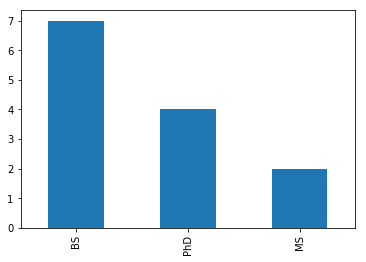

In [17]:
degree_counts.plot(kind='bar')

## Exercise

Try extracting rows 5-10 of our DataFrame, preserving only the "Previous Employers" and "Hired" columns. Assign that to a new DataFrame, and create a histogram plotting the distribution of the previous employers in this subset of the data.

In [18]:
df[['Previous employers', 'Hired']][5:11]

,Previous employers,Hired
5,0,Y
6,2,Y
7,1,Y
8,5,Y
9,0,N
10,1,N


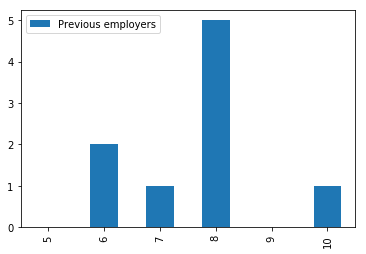

In [53]:
sub_counts= df[['Previous employers', 'Hired']][5:11]
sub_counts.plot(kind='bar')